In [79]:
import netCDF4 as nc
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import collections

In [80]:
import xarray as xr
xr.open_dataset("/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/GLDAS_NOAH10_M.A201412.020.nc4")

<xarray.Dataset>
Dimensions:                (time: 1, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time                   (time) datetime64[ns] 2014-12-01
  * lon                    (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                    (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2019-09-27T15:13:34.932
    source:                 Noah_v3.6 forced with Princeton_V2.2
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [176]:
p = "/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/"

In [179]:
mississ_df = pd.DataFrame()

for filename in os.listdir(p):
    try:
        xd = xr.open_dataset(p+str(filename))
        xd_df = xd.to_dataframe()
        xd_df.reset_index(inplace=True)
        int_df = xd_df[["time", "lon", "lat", "SWE_inst", 'SoilMoi0_10cm_inst',
           'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst']]        
        df_slice = int_df.iloc[95357]
        mississ_df = pd.concat([mississ_df, df_slice], axis=1)
    except:
        pass
    #print(filename)

In [180]:
mississ_df

,95357,95357,95357,95357,95357,95357,95357,95357,95357,95357,...,95357,95357,95357,95357,95357,95357,95357,95357,95357,95357
time,2009-05-01 00:00:00,2014-12-01 00:00:00,2014-11-01 00:00:00,2014-10-01 00:00:00,2014-09-01 00:00:00,2014-08-01 00:00:00,2014-07-01 00:00:00,2014-06-01 00:00:00,2014-05-01 00:00:00,2014-04-01 00:00:00,...,1948-10-01 00:00:00,1948-09-01 00:00:00,1948-08-01 00:00:00,1948-07-01 00:00:00,1948-06-01 00:00:00,1948-05-01 00:00:00,1948-04-01 00:00:00,1948-03-01 00:00:00,1948-02-01 00:00:00,1948-01-01 00:00:00
lon,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,...,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5,95.5
lat,47.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5,...,47.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5,47.5
SWE_inst,0.006935,0.610484,0.223667,0.043145,0.011917,0.0,0.0,0.0,0.0,0.0375,...,0.0,0.062208,0.0,0.0,0.0,0.032056,0.032042,0.524073,0.398707,0.442591
SoilMoi0_10cm_inst,12.241451,12.015084,12.932709,15.167588,16.006437,15.328012,16.764355,16.158567,15.237214,13.607984,...,15.504827,17.73708,16.328852,17.509081,15.958171,14.85473,12.813025,10.682569,11.110646,11.573445
SoilMoi10_40cm_inst,46.728817,46.407791,46.41626,46.834347,48.024326,47.783836,52.63726,49.006886,49.510033,49.785503,...,51.064651,52.035145,51.640285,54.649769,50.73465,51.383934,51.664322,51.718102,51.71833,51.718342
SoilMoi40_100cm_inst,88.155922,83.334808,83.342369,83.383392,83.788216,85.130653,87.108299,86.928268,87.512695,87.680832,...,91.895294,91.830193,93.293503,95.166039,95.754066,96.761818,96.944405,96.965111,96.965424,96.965424
SoilMoi100_200cm_inst,185.284576,179.622284,179.665054,179.809143,180.108322,180.410294,180.615707,180.85199,180.853928,180.798691,...,191.200562,191.542557,192.019287,192.414291,192.915329,192.828583,192.793671,192.793671,192.793671,192.793671


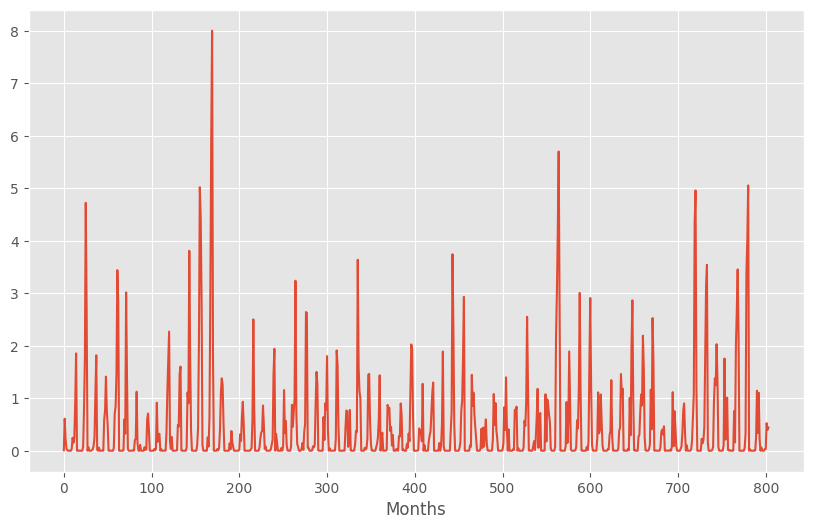

In [200]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(list(mississ_df.iloc[3]))
plt.xlabel("Months")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


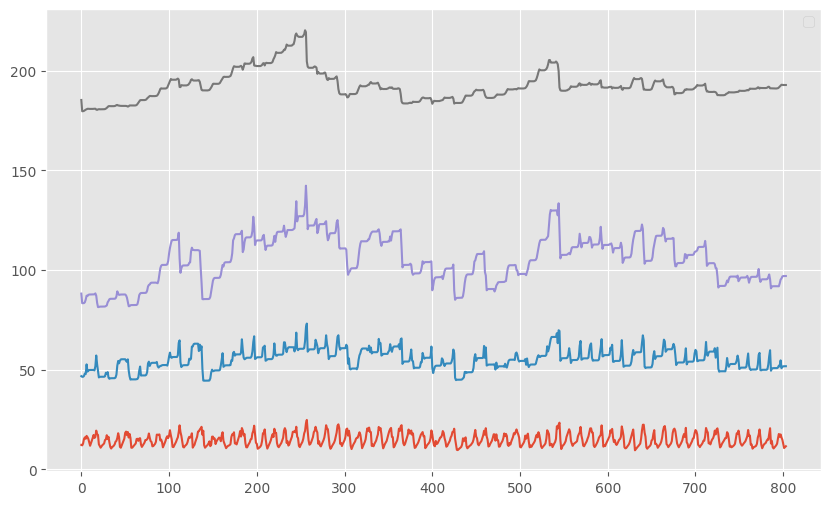

In [198]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(list(mississ_df.iloc[4]))
plt.plot(list(mississ_df.iloc[5]))
plt.plot(list(mississ_df.iloc[6]))
plt.plot(list(mississ_df.iloc[7]))
plt.legend()
plt.show()

In [68]:
xd = xr.open_dataset("/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/GLDAS_NOAH10_M.A201412.020.nc4")

In [138]:
xr_df = xd.to_dataframe()
xr_df.reset_index(inplace=True)

In [139]:
xr_df

,time,bnds,lon,lat,time_bnds,Swnet_tavg,Lwnet_tavg,Qle_tavg,Qh_tavg,Qg_tavg,...,ESoil_tavg,RootMoist_inst,CanopInt_inst,Wind_f_inst,Rainf_f_tavg,Tair_f_inst,Qair_f_inst,Psurf_f_inst,SWdown_f_tavg,LWdown_f_tavg
0,2014-12-01,0,-179.5,-59.5,2014-12-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-01,0,-179.5,-58.5,2014-12-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01,0,-179.5,-57.5,2014-12-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01,0,-179.5,-56.5,2014-12-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01,0,-179.5,-55.5,2014-12-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,2014-12-01,1,179.5,85.5,2015-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107996,2014-12-01,1,179.5,86.5,2015-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107997,2014-12-01,1,179.5,87.5,2015-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107998,2014-12-01,1,179.5,88.5,2015-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
latlon_df = xr_df[["lon","lat"]]

In [160]:
for i in range(0,len(latlon_df)):
    if list(latlon_df.iloc[i]) == [95.5,47.5]:
        print(i)

41357
95357


In [132]:
lat_lon_coords = np.empty((150,360),dtype=object)

xd_lat = np.array(xd["lat"]).flatten()
xd_lon = np.array(xd["lon"]).flatten()

for i in range(0,len(xd_lat)):
    for j in range(0,len(xd_lon)):
        lat_lon_coords[i,j] = (xd_lat[i], xd_lon[i])

In [133]:
lat_lon_coords

array([[(-59.5, -179.5), (-59.5, -179.5), (-59.5, -179.5), ...,
        (-59.5, -179.5), (-59.5, -179.5), (-59.5, -179.5)],
       [(-58.5, -178.5), (-58.5, -178.5), (-58.5, -178.5), ...,
        (-58.5, -178.5), (-58.5, -178.5), (-58.5, -178.5)],
       [(-57.5, -177.5), (-57.5, -177.5), (-57.5, -177.5), ...,
        (-57.5, -177.5), (-57.5, -177.5), (-57.5, -177.5)],
       ...,
       [(87.5, -32.5), (87.5, -32.5), (87.5, -32.5), ..., (87.5, -32.5),
        (87.5, -32.5), (87.5, -32.5)],
       [(88.5, -31.5), (88.5, -31.5), (88.5, -31.5), ..., (88.5, -31.5),
        (88.5, -31.5), (88.5, -31.5)],
       [(89.5, -30.5), (89.5, -30.5), (89.5, -30.5), ..., (89.5, -30.5),
        (89.5, -30.5), (89.5, -30.5)]], dtype=object)

In [40]:
p1 = "/home/maiampow/remoteData/GLDAS/NOAH_monthly"

In [27]:
noah_d1 = pd.DataFrame()

for filename in os.listdir(p):
    try:
        data = nc.Dataset(p+str(filename))
        df = pd.DataFrame([data.variables])
        noah_d1 = pd.concat([noah_d1, df], axis=0)
    except:
        pass

In [29]:
noah_d1.columns

Index(['time', 'time_bnds', 'lon', 'lat', 'Swnet_tavg', 'Lwnet_tavg',
       'Qle_tavg', 'Qh_tavg', 'Qg_tavg', 'Snowf_tavg', 'Rainf_tavg',
       'Evap_tavg', 'Qs_acc', 'Qsb_acc', 'Qsm_acc', 'AvgSurfT_inst',
       'Albedo_inst', 'SWE_inst', 'SnowDepth_inst', 'SoilMoi0_10cm_inst',
       'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst',
       'SoilTMP0_10cm_inst', 'SoilTMP10_40cm_inst', 'SoilTMP40_100cm_inst',
       'SoilTMP100_200cm_inst', 'PotEvap_tavg', 'ECanop_tavg', 'Tveg_tavg',
       'ESoil_tavg', 'RootMoist_inst', 'CanopInt_inst', 'Wind_f_inst',
       'Rainf_f_tavg', 'Tair_f_inst', 'Qair_f_inst', 'Psurf_f_inst',
       'SWdown_f_tavg', 'LWdown_f_tavg'],
      dtype='object')